**Teknik Pemrosesan data yang dilakukan pertama-tama yaitu, Mencari Data set. Selanjutnya membuat file ipynb untuk melakukan pemrosesan dataset yang kami pilih. Dengan mengimport library Matplotlib, pandas, seaborn, dan numpy.**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

**Pemanggilan dataset**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving LungCap.csv to LungCap.csv


**--Pra Pemrosesan Data--**

**Menampilkan Dataset**

In [3]:
smoker = pd.read_csv('LungCap.csv')
print(smoker)

     LungCap(cc)  Age( years)  Height(inches) Smoke  Gender Caesarean
0          6.475            6            62.1    no    male        no
1         10.125           18            74.7   yes  female        no
2          9.550           16            69.7    no  female       yes
3         11.125           14            71.0    no    male        no
4          4.800            5            56.9    no    male        no
..           ...          ...             ...   ...     ...       ...
720        5.725            9            56.0    no  female        no
721        9.050           18            72.0   yes    male       yes
722        3.850           11            60.5   yes  female        no
723        9.825           15            64.9    no  female        no
724        7.100           10            67.7    no    male        no

[725 rows x 6 columns]


**--Pemrosesan data--**

**Menangani tabel kososong**

In [4]:
is_na = smoker.isna().all(axis=0)
is_na

LungCap(cc)       False
Age( years)       False
Height(inches)    False
Smoke             False
Gender            False
Caesarean         False
dtype: bool

**Mengecek data duplikat**

In [5]:
smoker_duplicate = smoker.drop_duplicates(inplace = True)
print(smoker_duplicate)

None


**Seleksi data untuk perokok**

In [6]:
smokerFilter = smoker[smoker['Smoke']== "yes"]
print(smokerFilter)

     LungCap(cc)  Age( years)  Height(inches) Smoke  Gender Caesarean
1         10.125           18            74.7   yes  female        no
18         7.025           11            61.2   yes  female        no
29        10.475           18            72.0   yes  female        no
65         7.350           13            67.5   yes  female        no
66         5.375           11            59.3   yes  female        no
..           ...          ...             ...   ...     ...       ...
697        6.450           16            66.5   yes    male        no
698        7.950           15            67.3   yes  female        no
717        8.825           16            71.3   yes  female        no
721        9.050           18            72.0   yes    male       yes
722        3.850           11            60.5   yes  female        no

[77 rows x 6 columns]


**Seleksi data bagi perokok bergender male**

In [7]:
smokerFilter2 = smokerFilter[smokerFilter['Gender'] == "male"]
print(smokerFilter2)
print(smokerFilter2.shape)

     LungCap(cc)  Age( years)  Height(inches) Smoke Gender Caesarean
92         9.750           13            72.8   yes   male        no
96         7.550           16            71.1   yes   male        no
100        8.025           13            66.2   yes   male        no
119       11.775           17            76.9   yes   male        no
121        6.450           12            61.0   yes   male       yes
156        9.350           11            71.2   yes   male        no
175        9.450           15            65.1   yes   male        no
237        7.925           11            67.1   yes   male        no
248       10.700           18            74.2   yes   male        no
280        8.500           17            72.5   yes   male        no
291       10.450           18            72.9   yes   male       yes
306        8.475           15            69.3   yes   male        no
341        6.325           13            59.9   yes   male       yes
417        9.100           14     

**Seleksi data bagi perokok bergender female**

In [8]:
smokerFilter3 = smokerFilter[smokerFilter['Gender'] == "female"]
print(smokerFilter3)
print(smokerFilter3.shape)

     LungCap(cc)  Age( years)  Height(inches) Smoke  Gender Caesarean
1         10.125           18            74.7   yes  female        no
18         7.025           11            61.2   yes  female        no
29        10.475           18            72.0   yes  female        no
65         7.350           13            67.5   yes  female        no
66         5.375           11            59.3   yes  female        no
75         4.975           12            62.6   yes  female       yes
88         7.475           15            63.0   yes  female        no
94        11.750           19            78.0   yes  female       yes
129        6.650           12            60.0   yes  female       yes
173        6.450           10            66.5   yes  female        no
178        9.850           17            72.4   yes  female       yes
218        7.350           15            61.9   yes  female       yes
220        6.575           14            59.7   yes  female       yes
238        9.475    

**Pertama kita hitung rasio persentase antara pria dan wanita**

In [9]:
smoker['Gender'].value_counts()

male      367
female    358
Name: Gender, dtype: int64

In [11]:
smoker['Gender'].value_counts(normalize=True)

male      0.506207
female    0.493793
Name: Gender, dtype: float64

**--VISUALISAI DATA--**

**Univariate Analysis**

**Pie Chart Data anatara Perokok dan Bukan Perokok**

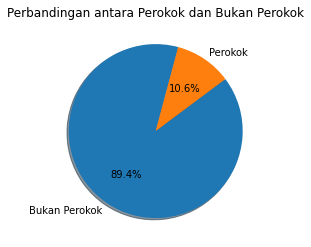

In [12]:
SmokerTidak = [np.count_nonzero(smoker['Smoke'] == 'no'),np.count_nonzero(smoker['Smoke'] == 'yes')]
label = ['Bukan Perokok','Perokok']
plt.title('Perbandingan antara Perokok dan Bukan Perokok')
plt.pie(SmokerTidak,labels=label,radius=1.0,startangle=75,shadow=True,autopct='%.1f%%')
plt.show()

**Pie Chart Perbandingan antara gender smoker**

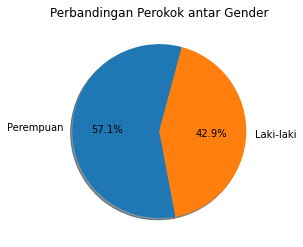

In [16]:
SmokerGender = [np.count_nonzero(smokerFilter['Gender'] == 'female'),np.count_nonzero(smokerFilter['Gender'] == 'male')]
label = ['Perempuan','Laki-laki']
plt.title('Perbandingan Perokok antar Gender')
plt.pie(SmokerGender,labels=label,radius=1.0,startangle=75,shadow=True,autopct='%.1f%%')
plt.show()

**Bivariate Analysis**

**Perbandingan perokok dan bukan perokok antar gender**

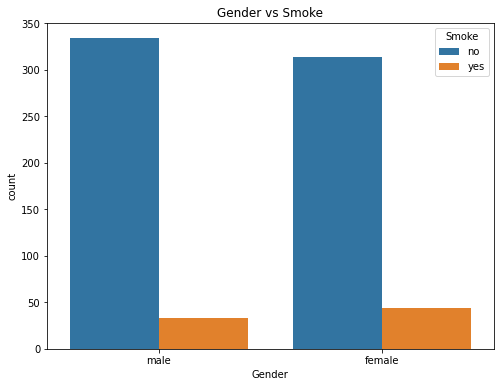

In [18]:
fig=plt.figure(figsize=(8,6))
sns.countplot(x='Gender',data=smoker,hue='Smoke')
plt.title('Gender vs Smoke')
plt.show()

**Line chart Rata-rata kapasitas paru-paru perokok dan bukan berokok berdasarkan umur**

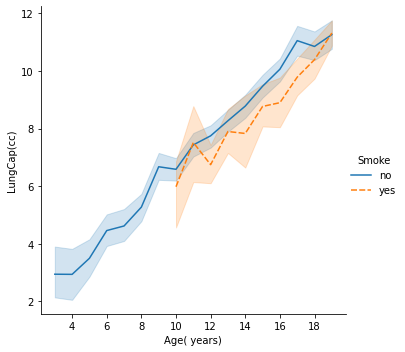

In [19]:
sns.relplot(y="LungCap(cc)", x="Age( years)", style="Smoke",hue="Smoke", kind="line", data=smoker)

**Bar Chart rata-rata paru-paru perokok dan bukan perokok dengan perbandingan umur**

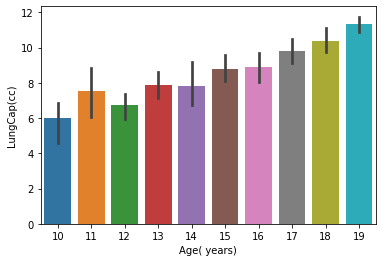

In [20]:
sns.barplot(x="Age( years)", y="LungCap(cc)",data=smokerFilter)

**Multivariate Analysis**

**Scatter chart perbandingan rata-rata kapasitas paru-paru perokok dan bukan perokok sesuai gender**

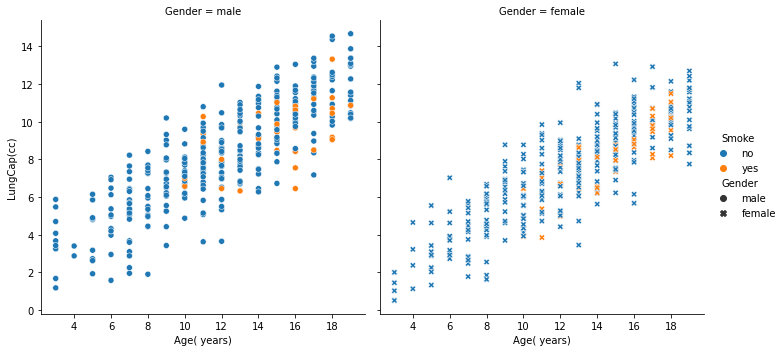

In [21]:
sns.relplot(y="LungCap(cc)", x="Age( years)", hue="Smoke", style="Gender", col="Gender",data=smoker)

**Scatter chart rata-rat kapasitas paru-paru perokok berdasarkan umur**

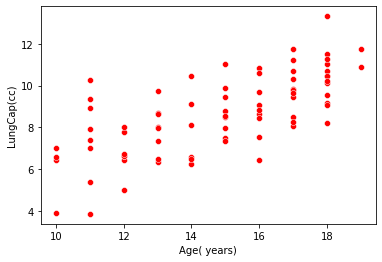

In [22]:
sns.scatterplot(x="Age( years)",y="LungCap(cc)",data= smokerFilter,color='r')

**Scatter Chart rata-rata kapasitas paru-paru perokok berdasarkan umur dan tiap gender**

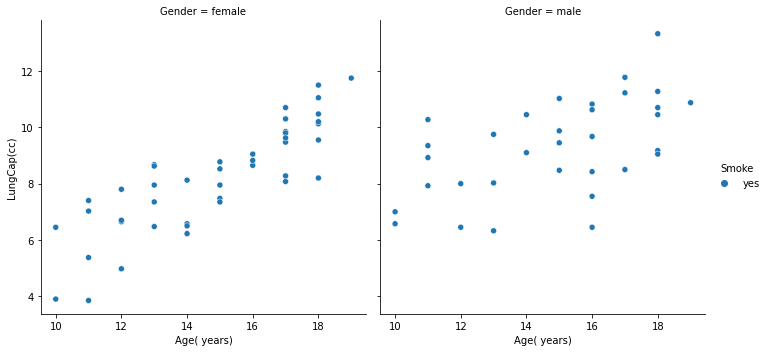

In [23]:
sns.relplot(y="LungCap(cc)", x="Age( years)",hue="Smoke",col="Gender",data= smokerFilter,color='r')